# regrestion Lineaire

In [64]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

In [65]:
x,y = make_regression(n_samples=100,n_features=2,noise=10)


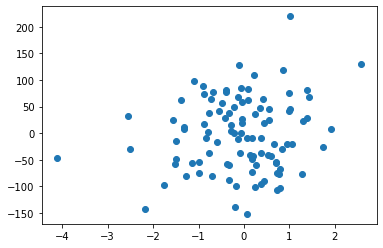

In [68]:
plt.scatter(x[:,0],y)

In [69]:
print(x.shape)
#### y = y + abs(y/2)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100, 1)


In [38]:
#matrice x
X = np.hstack((x,np.ones(x.shape)))
# ###########
X = np.hstack((x**2, X))
X[:5]

array([[ 1.96017625e-03, -4.42738778e-02,  1.00000000e+00],
       [ 8.26840373e-02,  2.87548322e-01,  1.00000000e+00],
       [ 2.60922098e+00,  1.61530832e+00,  1.00000000e+00],
       [ 1.31693990e-02, -1.14758002e-01,  1.00000000e+00],
       [ 5.06178638e-01,  7.11462324e-01,  1.00000000e+00]])

In [45]:
theta  = np.random.randn(3,1)
theta

array([[ 0.16137629],
       [-1.2887649 ],
       [-1.77157805]])

# 2. Modele 

In [46]:
def model(X, theta):
    return X.dot(theta)

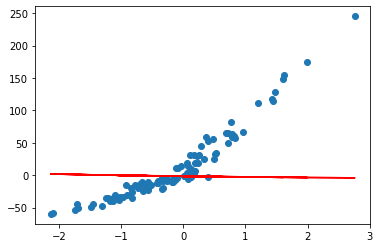

In [47]:
plt.scatter(x,y)
plt.plot(x, model(X, theta),c='r')

# 3. Fonction cout

In [28]:
def cout_fonction(X, y, theta):
    m = len(y)
    return 1/(2*m)*np.sum(model(X, theta)-y)**2

In [29]:
cout_fonction(X, y, theta)

4259.594471785662

# Gradients Descente de Gratient

In [30]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) -y)

In [31]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cos_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cos_history[i] = cout_fonction(X, y, theta)
    return theta, cos_history

# 5.  Entrainement du model
    Machine Learning

In [48]:
theta_final,cost_history = gradient_descent(X, y,theta, learning_rate=0.01, n_iterations=1000)

In [49]:
theta_final

array([[12.82309755],
       [56.54735019],
       [ 9.39149891]])

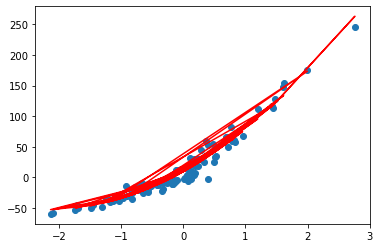

In [55]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.plot(x[:,0], predictions, c='r')

# Coubre d'apprentissage

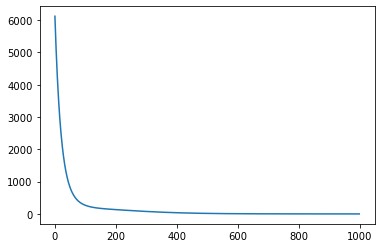

In [56]:
plt.plot(range(1000), cost_history)

## 7. Coefficient de Determination
    Performance du modele
    

In [57]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [58]:
coef_determination(y, predictions)

0.9640337909039565